In [1]:
from flu_matrix_completion import *

# Load in data from papers on H3N2 strains and antigenic mapping
Primarily using `HI_data_tables` class to keep track of data in a SQL datatables kind of way.

In [2]:
# Load in antisera-virus data as pd.DataFrames
HI_df = pd.read_csv("data/fonville_2014.csv", index_col='sampleID')
antisera_df = pd.read_csv("data/fonville_2014_antisera_table.csv", index_col='sampleID')
## Add data to HI_data_tables object
flu_data_tables = HI_data_tables() # Create HI_data_tables object
flu_data_tables.add_HI_data(HI_df=HI_df,
                            antisera_df=antisera_df) # Add data from Tal's ad Rong's original paper
flu_data_tables.compute_virus_dates() # Call compute_virus_dates method to compute years of virus

In [3]:
fonville_2014_groups = list(antisera_df.groupID.unique())
print(fonville_2014_groups)

['TableS1', 'TableS3', 'TableS5', 'TableS6', 'TableS13', 'TableS14']


In [4]:
# flu_data_tables.select_HI_data_by_group(group=fonville_2014_1_3_14).to_csv("data/fonville_2014_1_3_14.csv")
# antisera_df.iloc[[i in fonville_2014_1_3_14 for i in antisera_df['groupID']]].to_csv("data/fonville_2014_1_3_14_antisera_table.csv")

### How to use `HI_data_tables.select_HI_data_by_group` method

Text(0.5, 0.98, 'HI Heatmap for fonville 2014 antisera and H3N2 Strains')

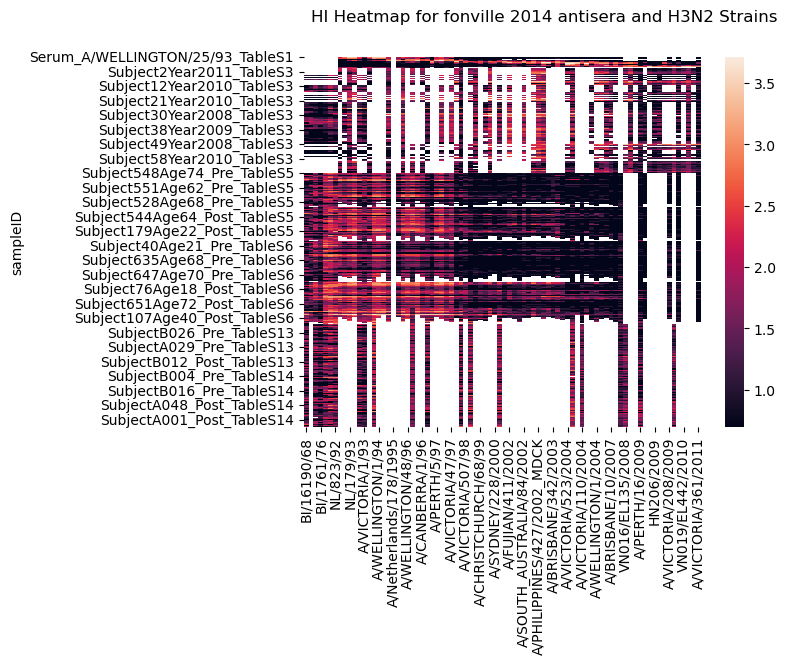

In [5]:
sns.heatmap(flu_data_tables.select_HI_data_by_group(group=fonville_2014_groups))
plt.suptitle('HI Heatmap for fonville 2014 antisera and H3N2 Strains')

['TableS1']
['TableS3']
['TableS5']
['TableS6']
['TableS13']
['TableS14']


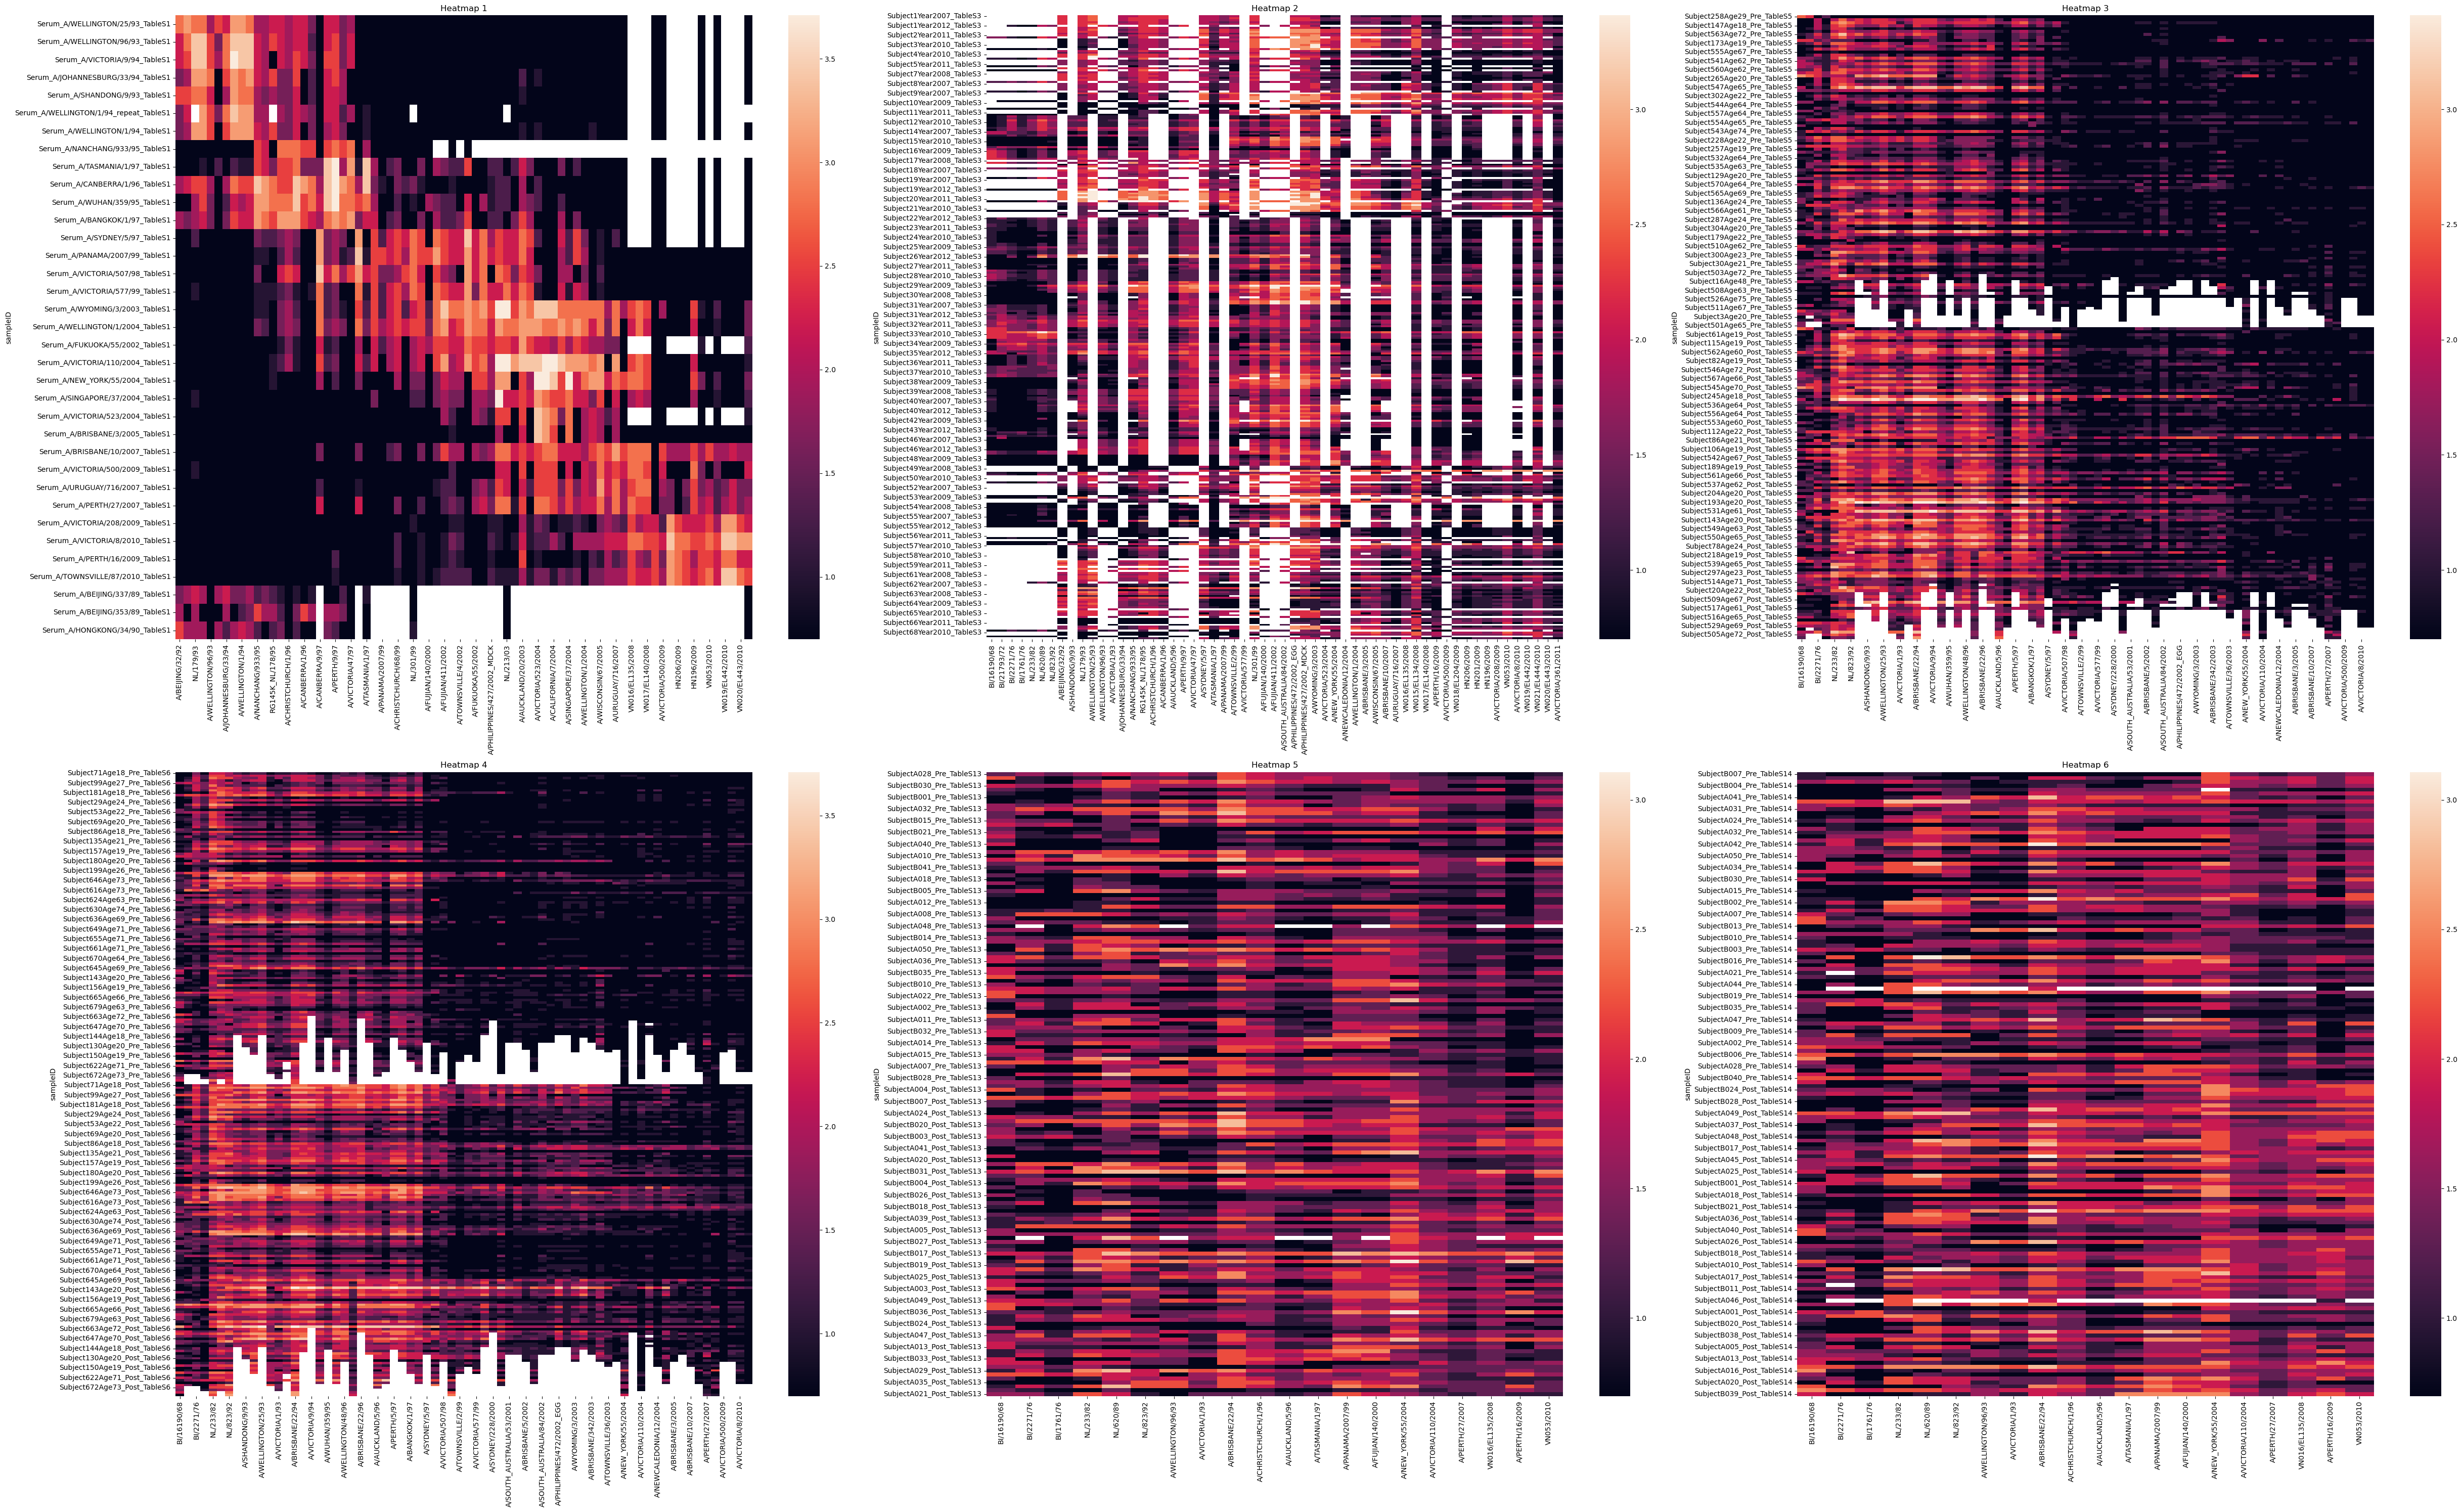

In [6]:
'''
Make a heatmap for each group
'''
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(50, 30))
# for i, ax in enumerate(axs):
#     data = flu_data_tables.select_HI_data_by_group(group=fonville_2014_groups[i])
#     sns.heatmap(data, ax=ax)
#     ax.set_title(f'Heatmap {i+1}')
    
# Looping through each subplot to plot a heatmap with each dataset
for i in range(2):
    for j in range(3):
        group = [fonville_2014_groups[i*3 + j]]
        print(group)
        data = flu_data_tables.select_HI_data_by_group(group=group).dropna(how='all', axis=1)
        sns.heatmap(data, ax=axs[i, j])
        axs[i, j].set_title(f'Heatmap {i*3 + j + 1}')

plt.tight_layout()
plt.show()

# Perform table-wise comparisons for each data group

In [3]:
np.random.seed(10)
comparisons_obj = transferability_comparisons(HI_data_tables=flu_data_tables)
comparisons_obj.train_comparison_trees(train_trees=1, best_trees=1)
# comparisons_obj.plot_comparisons(save_to='figs/fonville_hinojosa_ertesvag_train1best1_comparison_plot.png', alpha=0.4)

In [6]:
# other_comparisons_obj.save_data("models/fonville_hinojosa_ertesvag_train1best1_comparison_data.pkl")

In [7]:
# other_comparisons_obj = transferability_comparisons(HI_data_tables=flu_data_tables)
# other_comparisons_obj.load_data("models/fonville_hinojosa_ertesvag_train1best1_comparison_data.pkl")

# Compute ODRs for each table-wise comparison of models

In [4]:
'''
Work on fixing ODR computation
'''

comparisons_obj.compute_comparison_virus_ODR_df_dict()

0 0


In [5]:
comparisons_obj.plot_comparisons_with_ODRs(save_to='figs/fonville_2014_comparison_plot_w_ODRs_train20_best5_regular.png', s=100,  alpha=0.5)

# Analyses

# Load All Data

In [7]:
# Load in antisera-virus data as pd.DataFrames
all_HI_df = pd.read_csv("data/fonville_hinojosa_ertesvag_data.csv", index_col='sampleID')
all_antisera_df = pd.read_csv("data/fonville_hinojosa_ertesvag_antisera_table.csv", index_col='sampleID')
all_HI_data_tables  = HI_data_tables() # Create HI_data_tables object
all_HI_data_tables.add_HI_data(HI_df=all_HI_df,
                               antisera_df=all_antisera_df) # Add data from Tal's ad Rong's original paper
all_HI_data_tables.compute_virus_dates()

['TableS1' 'TableS3' 'TableS5' 'TableS6' 'TableS13' 'TableS14'
 'fon_children' 'fon_ferrets' 'hin_vu14vi15_PreVac' 'hin_vu14vi15_PostVac'
 'hin_vu15vi16_PreVac' 'hin_vu15vi16_PostVac' 'hin_u15u16_PreVac'
 'hin_u15u16_PostVac']
Error: 'group' should be a list.


<Axes: ylabel='sampleID'>

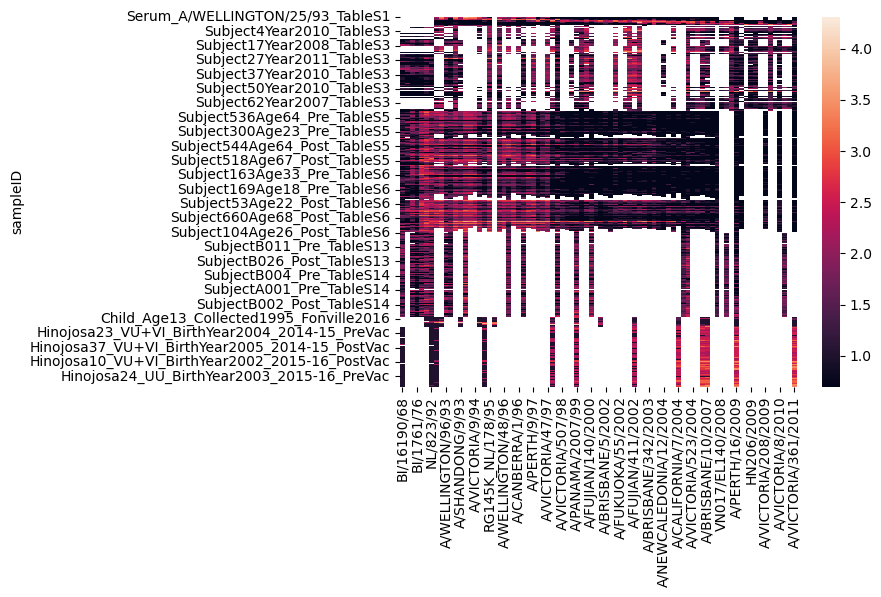

In [8]:
all_groups = all_antisera_df.groupID.unique()
print(all_groups)
sns.heatmap(all_HI_data_tables.select_HI_data_by_group(group=all_groups).dropna(how='all', axis=1))

# 2014 and 2016 Fonville Ferrets

<Axes: ylabel='sampleID'>

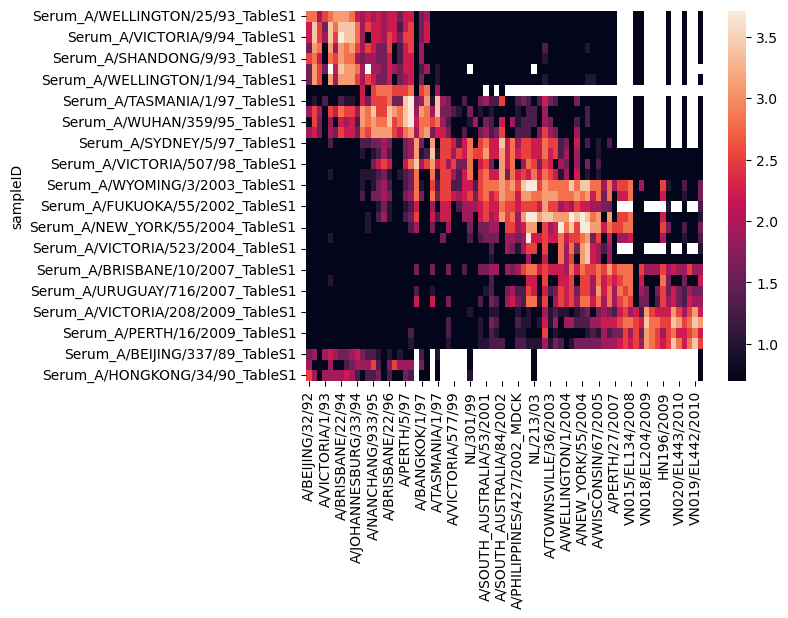

In [88]:
sns.heatmap(all_HI_data_tables.select_HI_data_by_group(group=["TableS1"]).dropna(how='all', axis=1))

<Axes: ylabel='sampleID'>

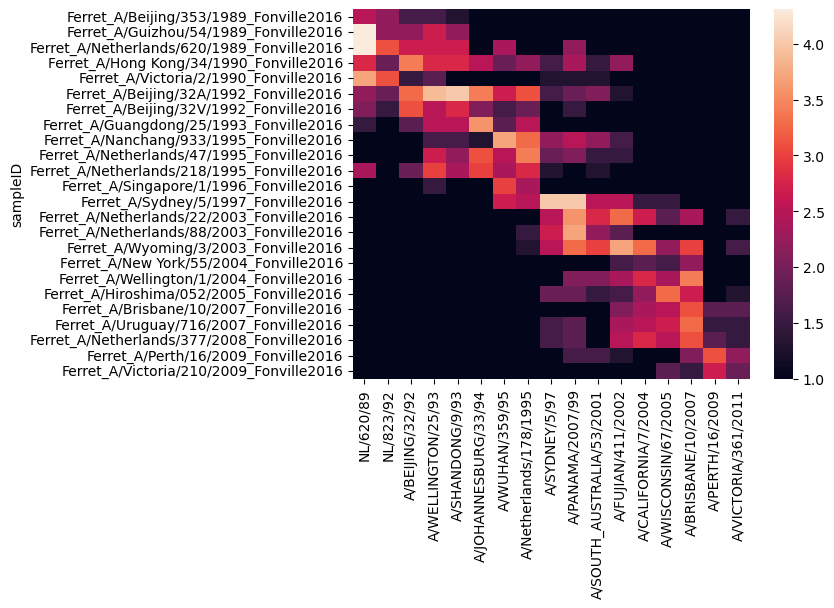

In [89]:
sns.heatmap(all_HI_data_tables.select_HI_data_by_group(group=["fon_ferrets"]).dropna(how='all', axis=1))

In [34]:
fon_ferrets_2016_viruses = all_HI_data_tables.select_HI_data_by_group(group=["fon_ferrets"]).dropna(axis=1, how="all").columns
fon_ferrets_2014_viruses = all_HI_data_tables.select_HI_data_by_group(group=["TableS1"]).dropna(axis=1, how="all").columns
print(len(fon_ferrets_2016_viruses), len(fon_ferrets_2014_viruses))
len(set(fon_ferrets_2014_viruses).intersection(set(fon_ferrets_2016_viruses)))

17 74


In [62]:
# Load in relevant fonville ferret 2014 dfs
fonville_2014_ferrets_df = all_HI_data_tables.select_HI_data_by_group(group=["TableS1"])
fonville_2014_ferrets_antisera_df = all_HI_data_tables.antisera_table[pd.DataFrame(all_antisera_df["groupID"]=="TableS1")['groupID'].tolist()]

# Load in relevant fonville ferret 2016 dfs
fonville_2016_ferrets_df = all_HI_data_tables.select_HI_data_by_group(group=["fon_ferrets"])
fonville_2016_ferrets_antisera_df = all_HI_data_tables.antisera_table[pd.DataFrame(all_antisera_df["groupID"]=="fon_ferrets")['groupID'].tolist()]

## Add data to HI_data_tables object
fonville_2014_2016_ferrets_data_tables = HI_data_tables() # Create HI_data_tables object
fonville_2014_2016_ferrets_data_tables.add_HI_data(HI_df=fonville_2014_ferrets_df,
                                              antisera_df=fonville_2014_ferrets_antisera_df) # Add data from Tal's ad Rong's original paper
fonville_2014_2016_ferrets_data_tables.add_HI_data(HI_df=fonville_2016_ferrets_df,
                                              antisera_df=fonville_2016_ferrets_antisera_df) # Add data from Tal's ad Rong's original paper
fonville_2014_2016_ferrets_data_tables.compute_virus_dates() # Call compute_virus_dates method to compute years of virus


np.random.seed(10)
fonville_2014_2016_ferrets_data_tables_comparisons_obj = transferability_comparisons(HI_data_tables=fonville_2014_2016_ferrets_data_tables)
fonville_2014_2016_ferrets_data_tables_comparisons_obj.train_comparison_trees(train_trees=10, best_trees=5, n_feature=5, f_sample=0.3) # Tweak hyperparams: train_trees, n_feature (doesn't change much), f_sample (doesn't change much)

In [63]:
fonville_2014_2016_ferrets_data_tables_comparisons_obj.compute_comparison_virus_ODR_df_dict()

In [64]:
fonville_2014_2016_ferrets_data_tables_comparisons_obj.plot_comparisons_with_ODRs()

# Fonville 2014 S13 to S14

In [90]:
fon_human_2014_S13_viruses = all_HI_data_tables.select_HI_data_by_group(group=["TableS13"]).dropna(axis=1, how="all").columns
fon_human_2014_S14_viruses = all_HI_data_tables.select_HI_data_by_group(group=["TableS14"]).dropna(axis=1, how="all").columns
print(len(fon_human_2014_S13_viruses), len(fon_human_2014_S14_viruses))
len(set(fon_human_2014_S13_viruses).intersection(set(fon_human_2014_S14_viruses)))

20 20


20

In [91]:
# Load in relevant fonville ferret 2014 dfs
fon_human_2014_S13_df = all_HI_data_tables.select_HI_data_by_group(group=["TableS13"])
fon_human_2014_S13_antisera_df = all_HI_data_tables.antisera_table[pd.DataFrame(all_antisera_df["groupID"]=="TableS13")['groupID'].tolist()]

# Load in relevant fonville ferret 2016 dfs
fon_human_2014_S14_df = all_HI_data_tables.select_HI_data_by_group(group=["TableS14"])
fon_human_2014_S14_antisera_df = all_HI_data_tables.antisera_table[pd.DataFrame(all_antisera_df["groupID"]=="TableS14")['groupID'].tolist()]

## Add data to HI_data_tables object
fonville_2014_human_data_tables = HI_data_tables() # Create HI_data_tables object
fonville_2014_human_data_tables.add_HI_data(HI_df=fon_human_2014_S13_df,
                                              antisera_df=fon_human_2014_S13_antisera_df) # Add data from Tal's ad Rong's original paper
fonville_2014_human_data_tables.add_HI_data(HI_df=fon_human_2014_S14_df,
                                              antisera_df=fon_human_2014_S14_antisera_df) # Add data from Tal's ad Rong's original paper
fonville_2014_human_data_tables.compute_virus_dates() # Call compute_virus_dates method to compute years of virus


np.random.seed(10)
fonville_2014_human_data_tables_comparisons_obj = transferability_comparisons(HI_data_tables=fonville_2014_human_data_tables)
fonville_2014_human_data_tables_comparisons_obj.train_comparison_trees(train_trees=10, best_trees=5, n_feature=5, f_sample=0.3) # Tweak hyperparams: train_trees, n_feature (doesn't change much), f_sample (doesn't change much)

In [92]:
fonville_2014_human_data_tables_comparisons_obj.compute_comparison_virus_ODR_df_dict()

In [93]:
fonville_2014_human_data_tables_comparisons_obj.plot_comparisons_with_ODRs()

In [18]:
extra_groups = ['fon_children', 'fon_ferrets', 'hin_vu14vi15_PreVac',
       'hin_vu14vi15_PostVac', 'hin_vu15vi16_PreVac',
       'hin_vu15vi16_PostVac', 'hin_u15u16_PreVac', 'hin_u15u16_PostVac']
ferrets_group = ['fon_ferrets']
extra_flu_df = extra_flu_data_tables.select_HI_data_by_group(group=ferrets_group).set_index("sampleID")

<Axes: ylabel='sampleID'>

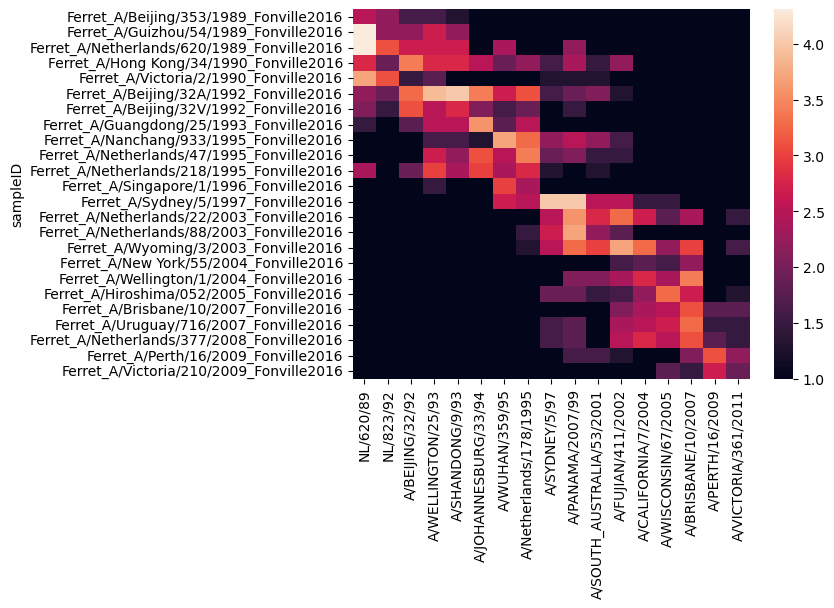

In [19]:
sns.heatmap(extra_flu_df.dropna(axis=1, how="all"))

In [ ]:
# RMSE: Feed coords of scatter into line model

In [8]:
x = comparisons_obj.intra_RMSE_dict['TableS3 TO TableS1']
y = comparisons_obj.cross_RMSE_dict['TableS3 TO TableS1']

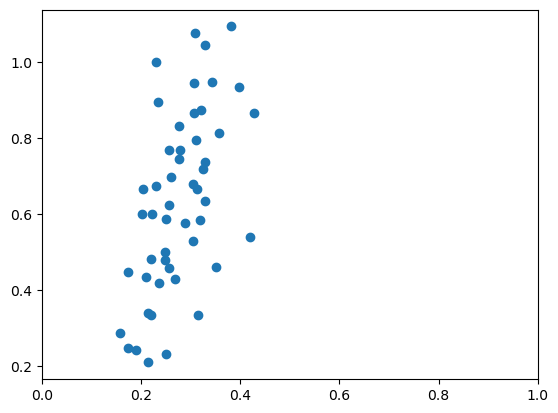

In [9]:
plt.scatter(x, y)
plt.xlim(0,1)

fitted_x = 2.65*np.array(x) - 0.14

In [10]:
sum((fitted_x - np.array(y))**2)/len(fitted_x) # This is how, use fitted function on x instead, use y=x portion if x points do fall there (piecewise)

0.04059466224900739

In [11]:
comparisons_obj.comparison_ODR_df_dict['TableS3 TO TableS14'][-1][0]

IndexError: invalid index to scalar variable.

# See how combining trees trained on different datasets can impact performance

### Compute `comparison_combiner_dict`

In [12]:
comparisons_obj.compute_comparison_combiner_dict()

Error: 'group' should be a list.


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by DecisionTreeRegressor.

### Visualize how model trained on TableS13 performs for predicting HI for TableS14 viruses

In [13]:
preds, errs = combine_predictions(target_virus_name='A/AUCKLAND/5/96',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS13'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS13 TO TableS14']['A/AUCKLAND/5/96']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

### Visualize how combining models trained on 'TableS13', 'TableS1', and 'TableS3'  affects performance when predicting HI for TableS14 viruses
Error goes down quite a bit!

In [ ]:
preds, errs = combine_predictions(target_virus_name='A/AUCKLAND/5/96',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS13', 'TableS1', 'TableS3'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS13 TO TableS14']['A/AUCKLAND/5/96']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) # hmmm, adding datasets did seem to improve error!. Funny

### S3 to S14

In [ ]:
preds, errs = combine_predictions(target_virus_name='NL/620/89',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS3'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS3 TO TableS14']['NL/620/89']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
preds, errs = combine_predictions(target_virus_name='NL/620/89',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS1'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS1 TO TableS14']['NL/620/89']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
# comparisons_obj.compute_comparison_virus_ODR_df_dict()

### TableS1 to TableS14 Virus HI Prediction Benchmark

In [ ]:
preds, errs = combine_predictions(target_virus_name='A/VICTORIA/110/2004',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS1'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS1 TO TableS14']['A/VICTORIA/110/2004']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
# other_comparisons_obj.plot_comparisons_with_ODRs(save_to='figs/fonville_hinojosa_ertesvag_train1best1_comparison_plot_w_ODRs.png', alpha=0.4)